In [31]:
import numpy as np
import matplotlib.pyplot as plt

## global variables
LOWER = -1
UPPER = 2
SIZE = 10


## Function to be profiled
def function(x):
    return x*np.sin(10 * np.pi * x) + 2

In [32]:
## Generating the first population
def generatePopulation(size = SIZE, resolution = 7):
    
    POPULATION = []
    for _ in range(size):
        POPULATION += [np.array([np.random.randint(1000)%2 for __ in range(resolution)])]
    return np.array(POPULATION)

In [33]:
## Decoding the encoded individual in a population
def decode(individual):
    CONVERTER = np.array([2**(len(individual) - 1 - i) for i in range(len(individual))])
#   [2**6, 2**5, 2**4, 2**3, 2**2.... 2**0] . [1,0,1,0,1,1,1]
    
    number = np.dot(CONVERTER, individual)/2**len(individual)
    
    MIN = np.dot(CONVERTER, np.array([0 for i in range(len(individual))]))/2**len(individual) #[0,0,0,0,0,0,0]
    MAX = np.dot(CONVERTER, np.array([1 for i in range(len(individual))]))/2**len(individual) #[1,1,1,1,1,1,1]
    
    final = (UPPER - LOWER)*(number - MIN)/(MAX - MIN) + LOWER
    return final
decode()

In [34]:
## Fitness function
def fitnessFunc(individual):
    value = decode(individual)
    
    y = function(value)
    return y

In [35]:
##mutation function                                                                          
def mutate(individual, mutation_rate = 0.01):                                                
    if (np.random.random() > (1-mutation_rate)):                                             
        index = np.random.randint(len(individual))                                                  
        individual[index] = not individual[index]                                            
                                                                                             
    return individual                                                                        

In [36]:
##crossover function + mutation function - the version which produces 4 children                                     
def reproduce(individual1, individual2):                                                     
    split_point = np.random.randint(len(individual1))                                        
                                                                                             
    child1 = np.concatenate((individual1[:split_point], individual2[split_point:]))             
    child2 = np.concatenate((individual2[:split_point], individual1[split_point:])) 
         
    child3 = np.concatenate((individual1[split_point:], individual2[:split_point]))          
    child4 = np.concatenate((individual2[split_point:], individual1[:split_point]))          
                                                                                             
    child1 = mutate(child1)                                                                     
    child2 = mutate(child2)                                                                  
    child3 = mutate(child3)                                                                     
    child4 = mutate(child4)                                                                     
                                                                                             
    return [child1, child2, child3, child4]                                                     
                                                                                        

In [37]:
##adding children/ new individuals into ppulation while cecking for duplicate entries
def appendChildren(population, children):
    for child in children:
        if child.tolist() not in population.tolist():
            population = np.concatenate((population, np.array([child])))
    return population

In [38]:
##reproduction, 
def formNextPopulation(population):
    pop_size = len(population)
    
    for individual1_index  in range(pop_size):
        for individual2_index in range(pop_size):
            if individual1_index != individual2_index:  
                children = reproduce(population[individual1_index], population[individual2_index])
                population = appendChildren(population, children)
            
    fitness_values = []
    
    for individual in population:
        fitness_values += [fitnessFunc(individual)]
        
    sorted_population = np.argsort(fitness_values)[::-1][:SIZE]
    
    return population[sorted_population]

In [39]:
#%%

##calling the first population generation function
POP = generatePopulation()

##keeping a track of generations
generation = 0


## the "question" plot
x = [-1 + (i*3/2**12) for i in range(2**12)]
y = [function(i) for i in x]

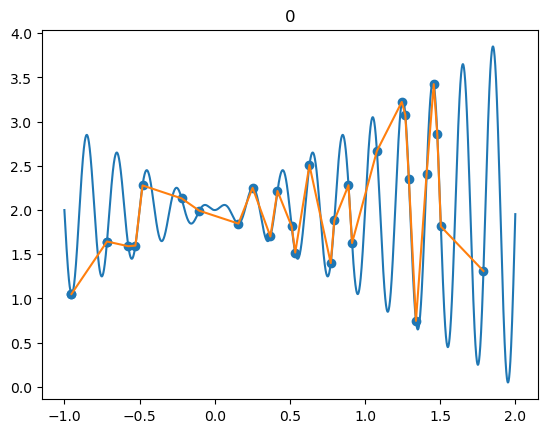

In [40]:
#%%

## to plot the individuals on the plot
individuals = []
functionValue = []
for individual in POP:
    individuals += [decode(individual)]              ##X values
    functionValue += [function(decode(individual))]  ##Y values


temp = np.argsort(individuals)                       ##sorting the points so that the profile lines are neat and not haphazard
individuals = np.array(individuals)[temp]
functionValue = np.array(functionValue)[temp]   

 
plt.title(generation)
plt.plot(x,y)
plt.scatter(individuals, functionValue)
plt.plot(individuals, functionValue)

##call the function that forms the next generation
POP = formNextPopulation(POP)
generation += 1

In [52]:
np.ones(3,)

array([1., 1., 1.])

In [53]:
64 rows 11 col layer 1
layer 2
64 rows

SyntaxError: invalid syntax (1789320122.py, line 1)

In [55]:
w2 = generatePopulation(64)
w1 = generatePopulation(704)

In [57]:
generatePopulation(64)

array([[1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1],
       [0,